<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [59]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


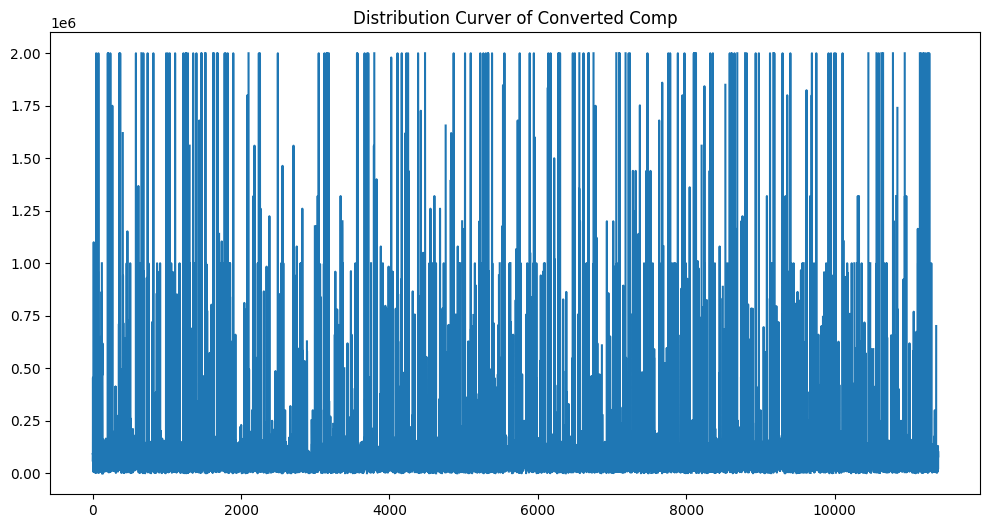

In [13]:
# your code goes here
plt.figure(figsize=(12, 6))
plt.plot(df['ConvertedComp'])

plt.title("Distribution Curver of Converted Comp")
plt.xlabel("")
plt.ylabel("")
plt.show()

Plot the histogram for the column `ConvertedComp`.


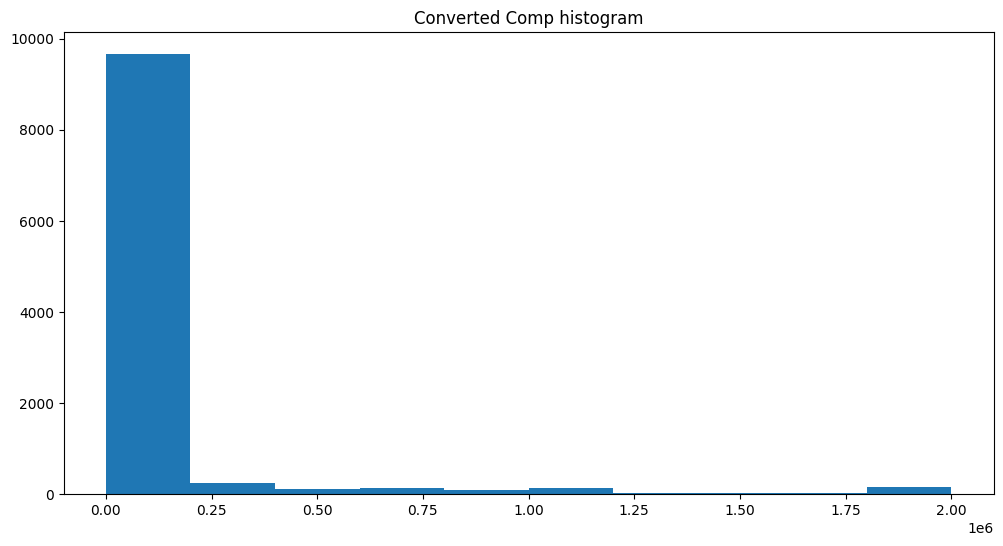

In [14]:
# your code goes here

plt.figure(figsize=(12, 6))
plt.hist(df["ConvertedComp"])
plt.title("Converted Comp histogram")
plt.show()

What is the median of the column `ConvertedComp`?


In [15]:
# your code goes here
df["ConvertedComp"].median()

57745.0

In [42]:
df["Age"].median()

29.0

How many responders identified themselves only as a **Man**?


In [21]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [29]:
# your code goes here
woman = df[df["Gender"] == "Woman"]
woman['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [31]:
# your code goes here
df["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


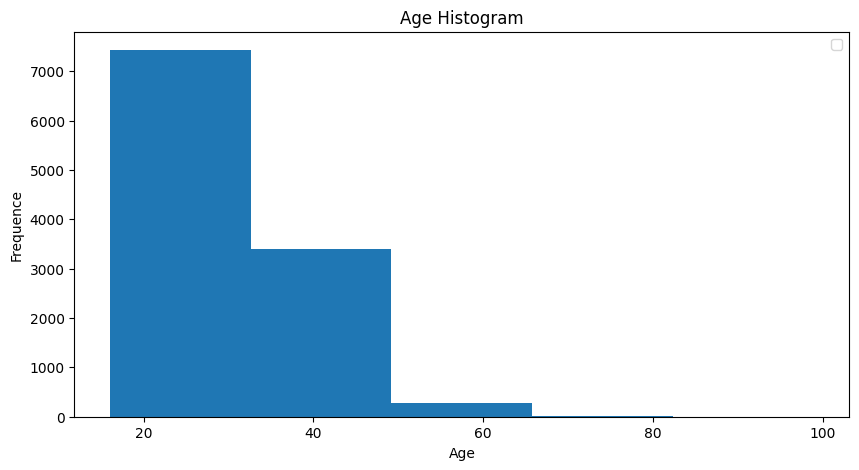

In [49]:
# your code goes here
plt.figure(figsize=(10, 5))

plt.hist(df["Age"], bins=5)
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Frequence")
plt.legend()
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


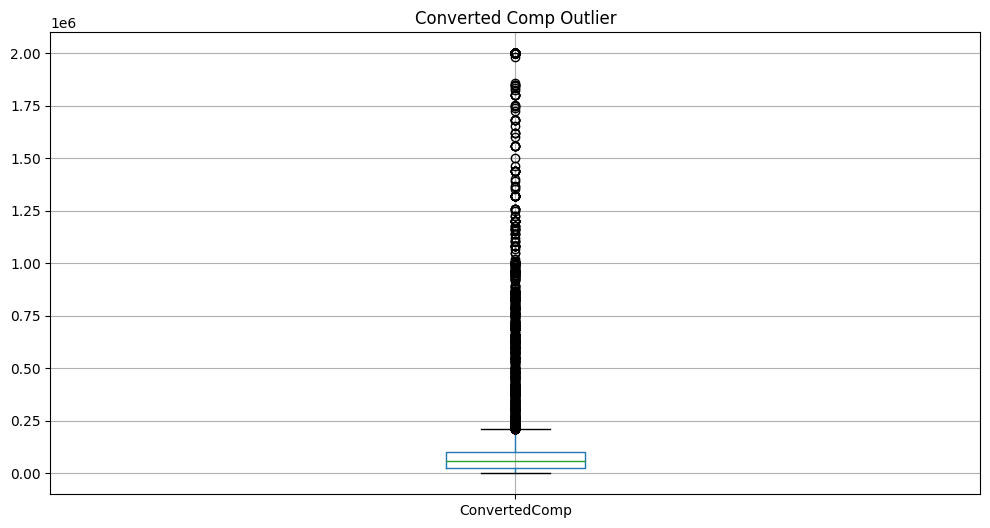

In [81]:
# your code goes here
plt.figure(figsize=(12,6))
df.boxplot(column=["ConvertedComp"])

plt.title("Converted Comp Outlier")
plt.show()

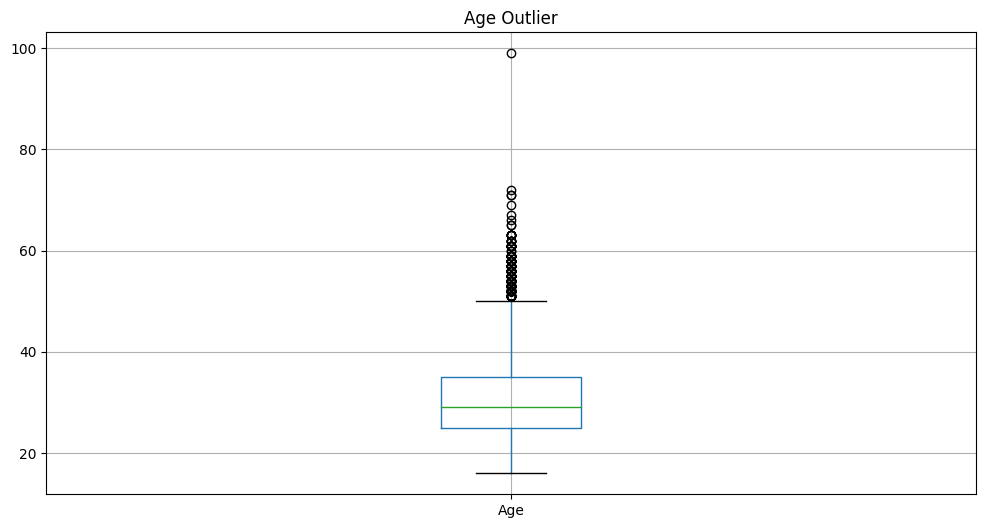

In [83]:
# your code goes here
plt.figure(figsize=(12,6))
df.boxplot(column=["Age"])

plt.title("Age Outlier")
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [90]:
# your code goes here

q1 = df["ConvertedComp"].quantile(0.25)
q3 = df["ConvertedComp"].quantile(0.75)

iqr = q3 - q1
print("Inter Quartile Range: ", iqr)

Inter Quartile Range:  73132.0


In [86]:
# your code goes here

q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)

iqr = q3 - q1
print("Outlier q1: ", q1)
print("Inter Quartile Range: ", iqr)

Outlier q1:  25.0
Inter Quartile Range:  10.0


Find out the upper and lower bounds.


In [91]:
# your code goes here

# Define the constant for identifying outliers
k = 1.5

# Calculate lower and upper bounds
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [92]:
# your code goes here

outliers = df[(df["ConvertedComp"] < lower_bound) | (df["ConvertedComp"] > upper_bound)]

print("Outliers:")
outliers["ConvertedComp"]

Outliers:


3         455352.0
13       1100000.0
45        229016.0
46       2000000.0
60       1000000.0
           ...    
11296     840000.0
11303    1000000.0
11350     300000.0
11353     260000.0
11369     701196.0
Name: ConvertedComp, Length: 879, dtype: float64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [93]:
# your code goes here

filtered_data = df[(df["ConvertedComp"] >= lower_bound) & (df["ConvertedComp"] <= upper_bound)]

# Display the new DataFrame without outliers
filtered_data["ConvertedComp"].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [105]:
# your code goes here

# first select numerical columns
numerical_columns = df.select_dtypes(include=[float, int]).columns

# calcutate the correlation
correlation_result = df[numerical_columns].corrwith(df["Age"])
correlation_result

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64

In [117]:
import seaborn as sns
import numpy as np

In [118]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

In [119]:
correlation_result.corr(method=histogram_intersection)

TypeError: corr() missing 1 required positional argument: 'other'

In [112]:
# Create a heatmap

sns.heatmap(correlation_result.corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

ValueError: Must pass 2-d input. shape=()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
